<font size = 6, color = "cyan"><b> Independent Project I </b></font>

<font size = 5, color = "pink"><b> HR Analytics: Employee Attrition </b></font>

<em><u>This project comprises two parts:</em></u>

_1. Statistical Insights & Predictions Using Machine Learning_

_2. Dashboard Visualization using Microsoft Power BI_

<font size = 4, color = "gold"><b> About the Dataset </b></font>
* The dataset titled [IBM HR Analytics Employee Attrition & Performance](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) was obtained through Kaggle
* It's a fictional dataset containing <u>1470 records and 35 attributes</u> (e.g., job satisfaction, job role, education, performance rating, years with current manager, etc.) with the <u>class being Attrition</u> (Yes/No Binary Variable)

<font size = 4, color = "gold"><b> Data Cleaning & Preprocessing</b></font>
<li>The dataset was cleaned using Microsoft Excel</li>
<li>The following data preprocessing operations were performed:</li>
        
        - Dropped Insignificant Features (Chi-Square Test) & Features With High Correlation/Weak Correlation 
        - One-Hot Encoding of Nominal Features, Ordinal Encoding of Ordinal Features, & Label Encoding
        - Feature Scaling (Z-Score Normalization)
        - Feature Selection (RFE for the Logistic Regression Model)
        - Handling Class Imbalance Using SMOTE-EEN

The new dataset after dropping features and encoding is already saved as a file that we can read directly and continue from. For more details on the data preprocessing steps, visit <font color = 'green'><em>1) Data Preprocessing, Chi-Square Analysis, & Logistic Regression Model</font></em> notebook

<font size = 4, color = "gold"><b> Data Preprocessing</b></font>

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [51]:
dataset_file_path = r'C:\Users\user\OneDrive\Desktop\Post-Grad Stuff\Analytics Practice\Datasets (Original Format)\preprocessed_attrition_dataset.csv'
df = pd.read_csv(filepath_or_buffer = dataset_file_path)
display(df)

,Age,Attrition,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,StockOptionLevel,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,2,3,2,4,8,1,0,...,0,0,0,0,0,1,0,0,0,1
1,49,0,2,3,2,2,2,1,0,1,...,0,0,0,0,1,0,0,0,1,0
2,37,1,1,4,2,1,3,6,1,0,...,1,0,0,0,0,0,0,0,0,1
3,33,0,2,4,3,1,3,1,1,0,...,0,0,0,0,1,0,0,0,1,0
4,27,0,1,1,3,1,2,9,0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,2,3,4,2,4,4,0,1,...,1,0,0,0,0,0,0,0,1,0
1466,39,0,1,4,2,3,1,4,0,1,...,0,0,0,0,0,0,0,0,1,0
1467,27,0,1,2,4,2,2,1,1,1,...,0,0,1,0,0,0,0,0,1,0
1468,49,0,2,4,2,2,2,2,0,0,...,0,0,0,0,0,1,0,0,1,0


In [ ]:
df.info()                       # provides insights on non-null count, dtype of each column
df.nunique()                    # shows number of unique values for each column
df.describe().drop('count')     # data summary (count, mean, standard deviation, min, max, and percentiles for each numerical column)

,Age,Attrition,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,StockOptionLevel,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
mean,36.923810,0.161224,1.086395,2.721769,2.729932,2.063946,2.728571,2.693197,0.282993,0.793878,...,0.176190,0.069388,0.098639,0.054422,0.198639,0.221769,0.056463,0.222449,0.457823,0.319728
std,9.135373,0.367863,0.532170,1.093082,0.711561,1.106940,1.102846,2.498009,0.450606,0.852077,...,0.381112,0.254199,0.298279,0.226925,0.399112,0.415578,0.230891,0.416033,0.498387,0.466530
min,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,2.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,36.000000,0.000000,1.000000,3.000000,3.000000,2.000000,3.000000,2.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,43.000000,0.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,60.000000,1.000000,2.000000,4.000000,4.000000,5.000000,4.000000,9.000000,1.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
X = df.drop(columns = ['Attrition'])
y = df['Attrition']

<font color = "gray"><b>Feature Scaling using Z-Score Normalization</b></font>

In [54]:
zscore_norm = StandardScaler()
X_rescaled = zscore_norm.fit_transform(X)
X_rescaled_df = pd.DataFrame(X_rescaled, columns = X.columns)      # SMOTE expects it as a dataframe
X_rescaled_df

,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,...,JobRole_Laboratory_Technician,JobRole_Manager,JobRole_Manufacturing_Director,JobRole_Research_Director,JobRole_Research_Scientist,JobRole_Sales_Executive,JobRole_Sales_Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,-0.162399,-0.660531,0.379672,-0.057788,1.153254,2.125136,1.591746,-0.932014,-0.421642,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,-0.918921,1.458650
1,1.322365,1.717339,0.254625,-1.026167,-0.057788,-0.660853,-0.678049,-0.628241,0.241988,-0.164511,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
2,0.008343,-0.162399,1.169781,-1.026167,-0.961486,0.246200,1.324226,1.591746,-0.932014,-0.550208,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,-0.918921,1.458650
3,-0.429664,1.717339,1.169781,0.379672,-0.961486,0.246200,-0.678049,1.591746,-0.932014,-0.421642,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
4,-1.086676,-0.162399,-1.575686,0.379672,-0.961486,-0.660853,2.525591,-0.628241,0.241988,-0.678774,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.717339,0.254625,1.785511,-0.057788,1.153254,0.523316,-0.628241,0.241988,0.735447,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1466,0.227347,-0.162399,1.169781,-1.026167,0.845911,-1.567907,0.523316,-0.628241,0.241988,-0.293077,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1467,-1.086676,-0.162399,-0.660531,1.785511,-0.057788,-0.660853,-0.678049,1.591746,0.241988,-0.678774,...,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,-0.534873,1.088232,-0.685565
1468,1.322365,1.717339,1.169781,-1.026167,-0.057788,-0.660853,-0.277594,-0.628241,-0.932014,0.735447,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.534873,1.088232,-0.685565


<font size = 4, color = "gold"><b> I. Statistical Insights & Predictions Using Machine Learning </b></font>

<font size = 4, color = "green"><b> Experimenting with Machine Learning Models </b></font>

In [55]:
from sklearn.feature_selection import SelectFromModel           # LASSO 
from sklearn.feature_selection import RFE                       # RFE

from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

<font size = 4, color = "gray"><b> 2) Decision Trees </b></font>

<font size = 4, color = "gray"> <em>
<li>Make decisions by asking a series of questions until it makes a prediction</li>
<li>Simple to understand, can be visualized, and require little data preprocessing</li>
<li>However, they are prone to overfitting -- can create complex trees that don’t generalize well to unseen data</li>
</em></font>

<font color = "gray"><u><em>No Feature Selection or Class Imbalance Handling</em></u>

Overall Decision Tree Model Performance:
- Accuracy: 80.95 %
- Precision: 41.67 %
- Recall: 41.67 %
- F1-score: 41.67 %

- Confusion Matrix: 
[[218  28]
 [ 28  20]]


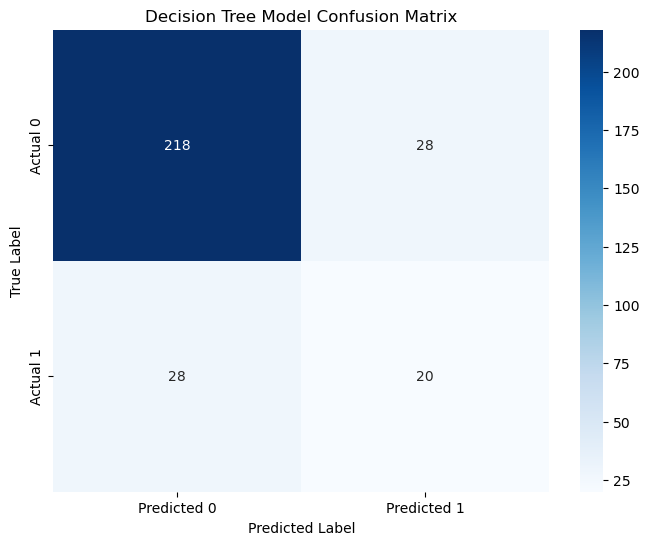

In [56]:
# split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X_rescaled_df, y, test_size = 0.20, random_state = 23)

decision_treeModel = DecisionTreeClassifier(random_state = 23)     # default criterion = gini, default splitter = best
decision_treeModel.fit(X_train, y_train)
predictionDT = decision_treeModel.predict(X_test)

accuracy_DT = accuracy_score(y_test, predictionDT)
f1score_DT = f1_score(y_test, predictionDT)
precision_DT = precision_score(y_test, predictionDT)
recall_DT = recall_score(y_test, predictionDT)

confMatrix_DT = confusion_matrix(y_test, predictionDT)

print("Overall Decision Tree Model Performance:")
print(f'- Accuracy: {accuracy_DT * 100:.2f} %')
print(f'- Precision: {precision_DT * 100:.2f} %')
print(f'- Recall: {recall_DT * 100:.2f} %')
print(f'- F1-score: {f1score_DT * 100:.2f} %\n')

print(f'- Confusion Matrix: \n{confMatrix_DT}')

plt.figure(figsize=(8, 6))
sns.heatmap(confMatrix_DT, annot = True, fmt = 'd', cmap='Blues', cbar = True,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Model Confusion Matrix')
plt.show()

As noticed, the model yields very low precision, recall, and F1-Scores while yielding a good accuracy score. Feature selection, class imbalance handling using SMOTE-EEN, and hyperparameter tuning must be done to improve model performance


<font color = "gray"><b>Feature Selection</b></font>


<font color = "gray"><u>Feature Importance</u>
<li><em>Assigning a score to input features based on their usefulness in predicting a target variable</em></li> 

<li> Tree-Based Models --> <u>Gini Importance (Mean Decrease in Impurity)</u>: calculating feature importance based on how much it reduces a criterion (e.g., Gini impurity or entropy) when making splits</li>
</font>

Feature: 0 -- Score: 0.09296
Feature: 1 -- Score: 0.02579
Feature: 2 -- Score: 0.06711
Feature: 3 -- Score: 0.05017
Feature: 4 -- Score: 0.08606
Feature: 5 -- Score: 0.03809
Feature: 6 -- Score: 0.08713
Feature: 7 -- Score: 0.06922
Feature: 8 -- Score: 0.02846
Feature: 9 -- Score: 0.05261
Feature: 10 -- Score: 0.05094
Feature: 11 -- Score: 0.04496
Feature: 12 -- Score: 0.04765
Feature: 13 -- Score: 0.03011
Feature: 14 -- Score: 0.03021
Feature: 15 -- Score: 0.00000
Feature: 16 -- Score: 0.02030
Feature: 17 -- Score: 0.01272
Feature: 18 -- Score: 0.00475
Feature: 19 -- Score: 0.00000
Feature: 20 -- Score: 0.00000
Feature: 21 -- Score: 0.01479
Feature: 22 -- Score: 0.00852
Feature: 23 -- Score: 0.02030
Feature: 24 -- Score: 0.00528
Feature: 25 -- Score: 0.00546
Feature: 26 -- Score: 0.00124
Feature: 27 -- Score: 0.00809
Feature: 28 -- Score: 0.00075
Feature: 29 -- Score: 0.00000
Feature: 30 -- Score: 0.02570
Feature: 31 -- Score: 0.01724
Feature: 32 -- Score: 0.00315
Feature: 33 -- Score

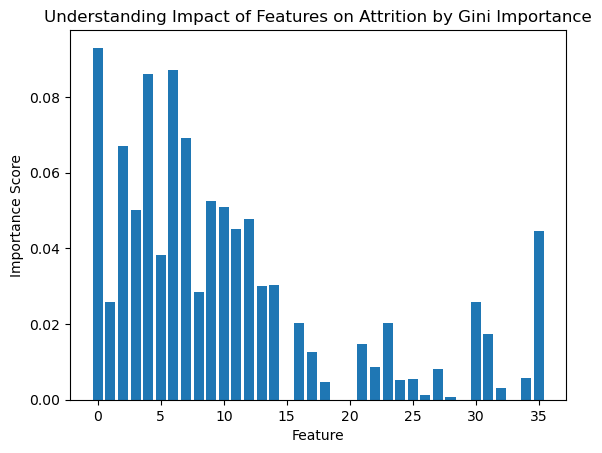

In [57]:
feature_importance = decision_treeModel.feature_importances_

for feature, imp_score in enumerate(feature_importance):
    print(f'Feature: {feature} -- Score: {imp_score:.5f}')

# plotting feature importance for visualization purposes
plt.bar([x for x in range(len(feature_importance))], feature_importance)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Understanding Impact of Features on Attrition by Gini Importance')
plt.show()

In [ ]:
dropped_features = X_rescaled_df.columns[feature_importance < 0.01]     # choice of threshold was based on model performance using SMOTE-EEN & feature selection
dropped_features

Index(['Department_Human_Resources', 'EducationField_Human_Resources',
       'EducationField_Life_Sciences', 'EducationField_Marketing',
       'EducationField_Other', 'JobRole_Healthcare_Representative',
       'JobRole_Human_Resources', 'JobRole_Laboratory_Technician',
       'JobRole_Manager', 'JobRole_Manufacturing_Director',
       'JobRole_Research_Director', 'JobRole_Sales_Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married'],
      dtype='object')

In [71]:
selected_features = X_rescaled_df.columns[feature_importance >= 0.01]
selected_features

Index(['Age', 'BusinessTravel', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsWithCurrManager', 'Department_Research_&_Development',
       'Department_Sales', 'EducationField_Medical',
       'EducationField_Technical_Degree', 'JobRole_Research_Scientist',
       'JobRole_Sales_Executive', 'MaritalStatus_Single'],
      dtype='object')

In [ ]:
selected_X_df = X_rescaled_df.drop(columns = dropped_features.to_list())
selected_X_df                                                               # 22 features

,Age,BusinessTravel,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,...,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Department_Research_&_Development,Department_Sales,EducationField_Medical,EducationField_Technical_Degree,JobRole_Research_Scientist,JobRole_Sales_Executive,MaritalStatus_Single
0,0.446350,-0.162399,-0.660531,0.379672,-0.057788,1.153254,2.125136,1.591746,-0.932014,-0.421642,...,-0.164613,-0.063296,0.245834,-1.374051,1.515244,-0.679141,-0.314093,-0.497873,1.873287,1.458650
1,1.322365,1.717339,0.254625,-1.026167,-0.057788,-0.660853,-0.678049,-0.628241,0.241988,-0.164511,...,0.488508,0.764998,0.806541,0.727775,-0.659960,-0.679141,-0.314093,2.008543,-0.533821,-0.685565
2,0.008343,-0.162399,1.169781,-1.026167,-0.961486,0.246200,1.324226,1.591746,-0.932014,-0.550208,...,-1.144294,-1.167687,-1.155935,0.727775,-0.659960,-0.679141,-0.314093,-0.497873,-0.533821,1.458650
3,-0.429664,1.717339,1.169781,0.379672,-0.961486,0.246200,-0.678049,1.591746,-0.932014,-0.421642,...,0.161947,0.764998,-1.155935,0.727775,-0.659960,-0.679141,-0.314093,2.008543,-0.533821,-0.685565
4,-1.086676,-0.162399,-1.575686,0.379672,-0.961486,-0.660853,2.525591,-0.628241,0.241988,-0.678774,...,-0.817734,-0.615492,-0.595227,0.727775,-0.659960,1.472448,-0.314093,-0.497873,-0.533821,-0.685565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.717339,0.254625,1.785511,-0.057788,1.153254,0.523316,-0.628241,0.241988,0.735447,...,-0.327893,-0.615492,-0.314873,0.727775,-0.659960,1.472448,-0.314093,-0.497873,-0.533821,-0.685565
1466,0.227347,-0.162399,1.169781,-1.026167,0.845911,-1.567907,0.523316,-0.628241,0.241988,-0.293077,...,-0.001333,0.764998,0.806541,0.727775,-0.659960,1.472448,-0.314093,-0.497873,-0.533821,-0.685565
1467,-1.086676,-0.162399,-0.660531,1.785511,-0.057788,-0.660853,-0.678049,1.591746,0.241988,-0.678774,...,-0.164613,-0.615492,-0.314873,0.727775,-0.659960,-0.679141,-0.314093,-0.497873,-0.533821,-0.685565
1468,1.322365,1.717339,1.169781,-1.026167,-0.057788,-0.660853,-0.277594,-0.628241,-0.932014,0.735447,...,0.325228,0.488900,1.086895,-1.374051,1.515244,1.472448,-0.314093,-0.497873,1.873287,-0.685565


<font color = "gray"><b>Handling Class Imbalance</b></font>

In [63]:
# Before Handling Class Imbalance
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

<font color = "gray"><u>SMOTE-EEN</u> (Without Feature Selection) -- <em> combines SMOTE with Edited Nearest Neighbor</em></font>

In [64]:
smote_een_DT = SMOTEENN(sampling_strategy = 'all', random_state = 23)
X_smote_resampled, y_smote_resampled = smote_een_DT.fit_resample(X_rescaled_df, y)
print(y_smote_resampled.value_counts())

print('\nX_smote_resampled: ', X_smote_resampled.shape)          # 1946 records, 36 attributes

X_Smote_train, X_Smote_test, y_Smote_train, y_Smote_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size = 0.20, random_state = 23)
DT_SmoteModel = DecisionTreeClassifier(random_state = 23)   

DT_SmoteModel.fit(X_Smote_train, y_Smote_train)
predictionDT_Smote = DT_SmoteModel.predict(X_Smote_test)

DT_SmoteModel_recall = recall_score(y_Smote_test, predictionDT_Smote)
DT_SmoteModel_f1score = f1_score(y_Smote_test, predictionDT_Smote)

print("\nOverall Logistic Regression Model Performance:")
print(f'- Recall: {DT_SmoteModel_recall * 100:.2f} %')
print(f'- F1-score: {DT_SmoteModel_f1score * 100:.2f} %')

1    1189
0     757
Name: Attrition, dtype: int64

X_smote_resampled:  (1946, 36)

Overall Logistic Regression Model Performance:
- Recall: 88.75 %
- F1-score: 90.83 %


c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<font color = "gray"><em><u>SMOTE-EEN:</u> With Feature Selection (Gini Importance)</em></font>

In [73]:
smote_een_DT_FS = SMOTEENN(sampling_strategy = 'all', random_state = 23)
X_FSsmote_resampled, y_FSsmote_resampled = smote_een_DT_FS.fit_resample(selected_X_df, y)
print(y_FSsmote_resampled.value_counts())

print('\nX_smote_resampled: ', X_FSsmote_resampled.shape)          # 1946 records, 36 attributes

X_FSSmote_train, X_FSSmote_test, y_FSSmote_train, y_FSSmote_test = train_test_split(X_FSsmote_resampled, y_FSsmote_resampled, test_size = 0.20, random_state = 23)
DT_SmoteModel_FS = DecisionTreeClassifier(random_state = 23)   

DT_SmoteModel_FS.fit(X_FSSmote_train, y_FSSmote_train)
predictionDT_Smote_FS = DT_SmoteModel_FS.predict(X_FSSmote_test)

DT_SmoteModel_FS_recall = recall_score(y_FSSmote_test, predictionDT_Smote_FS)
DT_SmoteModel_FS_f1score = f1_score(y_FSSmote_test, predictionDT_Smote_FS)

print("\nOverall Logistic Regression Model Performance:")
print(f'- Recall: {DT_SmoteModel_FS_recall * 100:.2f} %')
print(f'- F1-score: {DT_SmoteModel_FS_f1score * 100:.2f} %')

1    1178
0     751
Name: Attrition, dtype: int64

X_smote_resampled:  (1929, 22)

Overall Logistic Regression Model Performance:
- Recall: 92.53 %
- F1-score: 92.72 %


c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\user\anaconda3\envs\deep_learning1\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


<font color = "gray">Okay so we're getting a higher recall and F1-Scores when undersampled with Gini feature selection than without --> proceed with the Gini selected features to do model hyperparameter tuning </font>

<font color = "gray"><b>Parameter Fine Tuning</b></font>

In [77]:
param_grid = {
    'max_depth': list(range(2, 23, 5)) + [None],       
    'min_samples_split': list(range(2, 23, 5)),
    'min_samples_leaf': list(range(1, 23, 5))
}

gridSearch_log = GridSearchCV(estimator = DT_SmoteModel_FS, param_grid = param_grid, cv = 5, scoring = 'f1')
gridSearch_log.fit(X_FSSmote_train, y_FSSmote_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=17, random_state=23),
             param_grid={'max_depth': [2, 7, 12, 17, 22, None],
                         'min_samples_leaf': [1, 6, 11, 16, 21],
                         'min_samples_split': [2, 7, 12, 17, 22]},
             scoring='f1')

In [78]:
print(f'Best Score: {gridSearch_log.best_score_ * 100:.2f} %')
print(f'Best Parameters:\n{gridSearch_log.best_params_}')

Best Score: 90.91 %
Best Parameters:
{'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 2}


<font color = "gray"><u>Hypertuned Model</u></font>

Overall Decision Tree Model Performance:
- Accuracy: 90.93 %
- Precision: 92.92 %
- Recall: 92.53 %
- F1-score: 92.72 %
- Confusion Matrix: 
[[128  17]
 [ 18 223]]


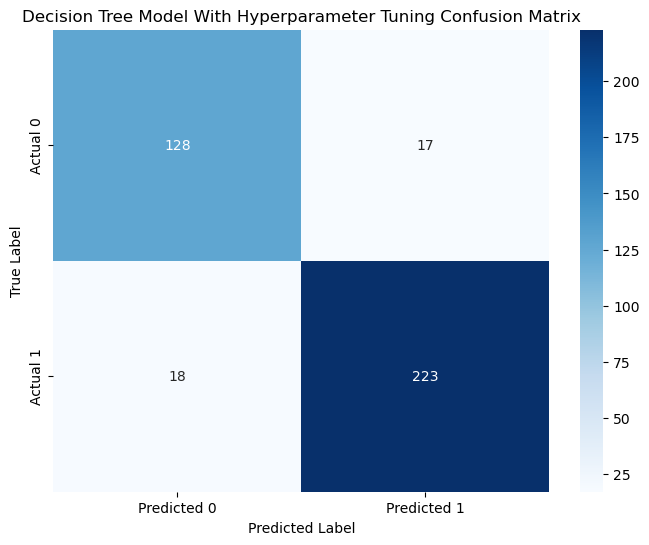

In [76]:
X_FSSmote_train, X_FSSmote_test, y_FSSmote_train, y_FSSmote_test = train_test_split(X_FSsmote_resampled, y_FSsmote_resampled, test_size = 0.20, random_state = 23)
DT_SmoteModel_FS = DecisionTreeClassifier(max_depth = 17, min_samples_leaf = 1, min_samples_split = 2, random_state = 23)   

DT_SmoteModel_FS.fit(X_FSSmote_train, y_FSSmote_train)
predictionDT_Smote_FS = DT_SmoteModel_FS.predict(X_FSSmote_test)

DT_SmoteModel_FS_accuracy = accuracy_score(y_FSSmote_test, predictionDT_Smote_FS)
DT_SmoteModel_FS_f1score = f1_score(y_FSSmote_test, predictionDT_Smote_FS)
DT_SmoteModel_FS_precision = precision_score(y_FSSmote_test, predictionDT_Smote_FS)
DT_SmoteModel_FS_recall = recall_score(y_FSSmote_test, predictionDT_Smote_FS)
DT_SmoteModel_FS_confMatrix = confusion_matrix(y_FSSmote_test, predictionDT_Smote_FS)


print("Overall Decision Tree Model Performance:")
print(f'- Accuracy: {DT_SmoteModel_FS_accuracy * 100:.2f} %')
print(f'- Precision: {DT_SmoteModel_FS_precision * 100:.2f} %')
print(f'- Recall: {DT_SmoteModel_FS_recall * 100:.2f} %')
print(f'- F1-score: {DT_SmoteModel_FS_f1score * 100:.2f} %')
print(f'- Confusion Matrix: \n{DT_SmoteModel_FS_confMatrix}')


plt.figure(figsize=(8, 6))
sns.heatmap(DT_SmoteModel_FS_confMatrix, annot = True, fmt = 'd', cmap ='Blues', cbar = True,
            xticklabels = ['Predicted 0', 'Predicted 1'],
            yticklabels = ['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Decision Tree Model With Hyperparameter Tuning Confusion Matrix')
plt.show()

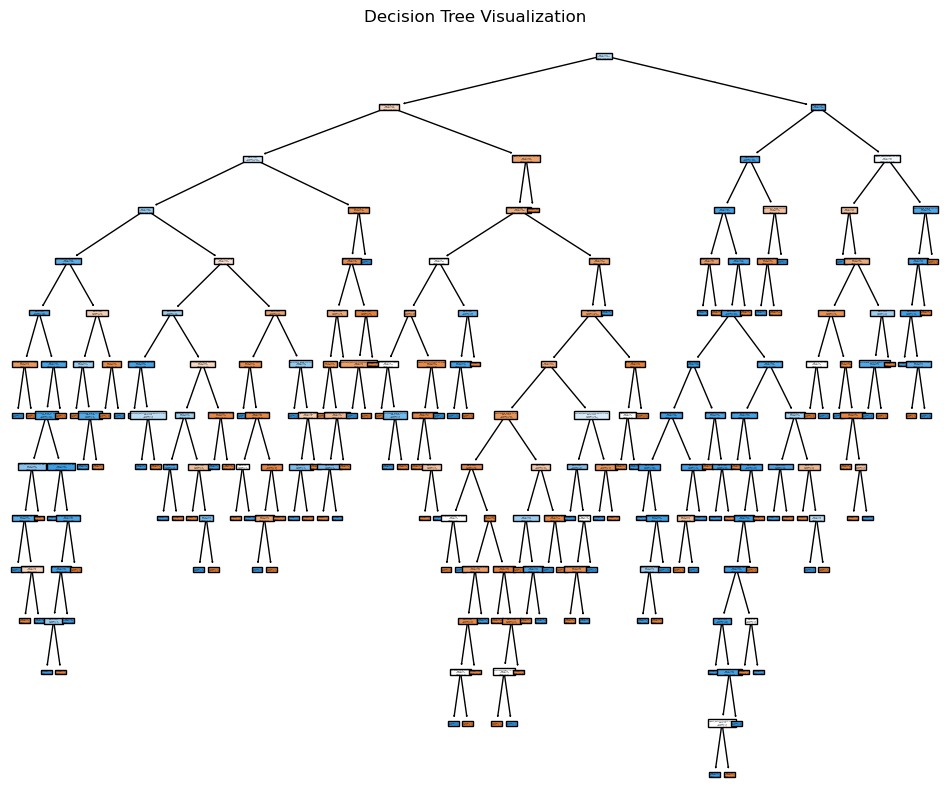

In [90]:
# we can also plot the decision tree for visualization
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(DT_SmoteModel_FS, filled = True, feature_names = X_FSsmote_resampled.columns)
plt.title('Decision Tree Visualization')
plt.show()

To recall, previously, these were the evaluation metrics with no parameter tuning, class imbalance handling, and feature selection:
*   Accuracy -- 80.95  %
*   Precision -- 41.67  %
*   Recall -- 41.67 %
*   F1-Score -- 41.67 %

After handing the class imbalance in the dataset using SMOTE-EEN, feature selection, and some parameter tuning:
*   Accuracy: 90.93 %
*   Precision: 92.92 %
*   Recall: 92.53 %
*   F1-score: 92.72 %

Between the very first model and the hypertuned model, accuracy rose by about 10%, whereas precision, recall, and F1 scores were significantly enhanced (from low 40% to low 90%). Model performance is excellent, i.e.:
-   Model is able to correctly identify employees that left (recall = 92.53%)
-   When the model predicts that an employee will leave, it is correct 92.92% of the time (precision) -- most employees the model predicts will leave actually do

<font color = "gray"><b><u>Conclusion:</u></b>
In HR, it is very important we can identify employees that are at risk of leaving the organization to retain talent and reduce costs. Hence, a high recall score is very important. This model performs well overall (F1-Score = 92.72%), where it is capable of correctly identifying employees at risk of leaving, hence, ensuring resources and effort is invested into retaining these talents. At the same time, the model reduces false positives (see precision bullet point) so that HR resources are not drained

So far, this model outperform the logistic regression model</font>